In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv(r'C:\Users\Fathima Hana.HANA\Downloads\car_age_price.csv')


In [7]:
df.shape

(112, 2)

In [8]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [10]:
df.columns

Index(['Year', 'Price'], dtype='object')

In [11]:
df.isna().sum()

Year     0
Price    0
dtype: int64

Handling outliers

In [15]:


for i in ['Year', 'Price']:
    Q1 = np.percentile(df[i], 25, method='midpoint')
    Q2 = np.percentile(df[i], 50, method='midpoint')
    Q3 = np.percentile(df[i], 75, method='midpoint')
    if Q2 == df[i].median():
        IQR = Q3 - Q1
        low_lim = Q1 - 1.5 * IQR
        up_lim = Q3 + 1.5 * IQR
        outlier = []
        for x in df[i]:
            if x > up_lim:
                outlier.append(x)
        ind2 = df[i] > up_lim
        ind3 = df[i] < low_lim
        print(f"Outliers in {i}: {outlier}")
        print(f"Indices of outliers in {i}: {df[ind2 | ind3].index}")


Outliers in Year: []
Indices of outliers in Year: Int64Index([], dtype='int64')
Outliers in Price: [755000]
Indices of outliers in Price: Int64Index([1], dtype='int64')


Best linear relationship between year and price target is price

In [17]:
df.columns

Index(['Year', 'Price'], dtype='object')

In [18]:
y= df['Price']
X= df.drop('Price', axis=1)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2,
                                                  random_state=42)
lr= LinearRegression()
model= lr.fit(X_train, y_train)
y_pred= model.predict(X_test)
y_pred

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [19]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [20]:
print('MSE is: ', mean_squared_error(y_test, y_pred))
print('R squared value is:', r2_score(y_test, y_pred))

MSE is:  4326906256.829671
R squared value is: 0.36759313425902185


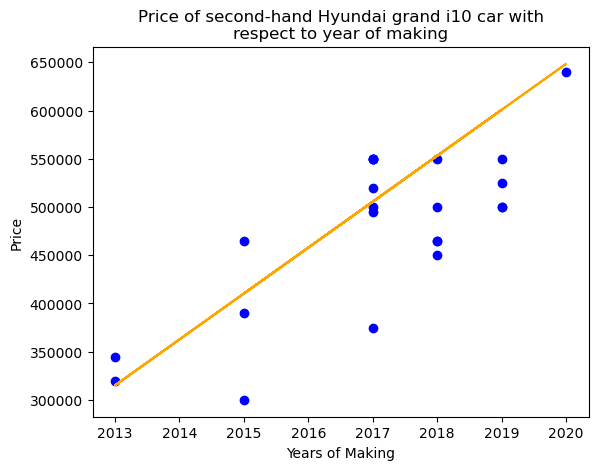

In [21]:
plt.scatter( X_test, y_test, color = 'blue' )

plt.plot( X_test, y_pred, color = 'orange' )

plt.title( '''Price of second-hand Hyundai grand i10 car with
respect to year of making''' )

plt.xlabel( 'Years of Making' )

plt.ylabel( 'Price' )

plt.show()

Price second hand at 2022

In [22]:
predicted_price = model.predict(np.array([[2022]]))
print('Predicted price at 2022:', predicted_price[0])

Predicted price at 2022: 743601.6159450412


C:\Users\Fathima Hana.HANA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Lasso Regression model

In [23]:
lasso = Lasso(alpha=0.1)  # alpha is the regularization parameter
model= lasso.fit(X_train, y_train)

# Predicting on the test set, can replace model with lasso itself
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R_squared:", r2)

Mean Squared Error: 4326901608.19506
R_squared: 0.36759381368868127


linear regression model works a bit better than lasso regression model